Dataset shape: (13156, 8)

First 5 rows:
    product_id         brand  \
0  B08YRWN3WB      JANSPORT   
1  B08YRXFZZM      JANSPORT   
2  B09Q2PQ7ZB       BAODINI   
3  B001BEAWXY  Calvin Klein   
4  B09FM5PMN3      JANSPORT   

                                               title   price    category  \
0  Big Student Large laptop backpack Black EK0A5B...  189.00  New season   
1                                Superbreak Day Pack  119.00  New season   
2  Mini Travel Umbrella With Case Small Compact U...   17.79  New season   
3           Men's Cotton Classics 3-Pack Boxer Brief  119.00  New season   
4                           Unisex Kids Bag Backpack  179.00  New season   

   rating                                          image_url  \
0     4.7  https://m.media-amazon.com/images/I/51y2EF0OmO...   
1     4.6  https://m.media-amazon.com/images/I/51yvvQUs3S...   
2     4.2  https://m.media-amazon.com/images/I/71WbrZPbnG...   
3     4.2  https://m.media-amazon.com/images/I/716vzeqa7Z.

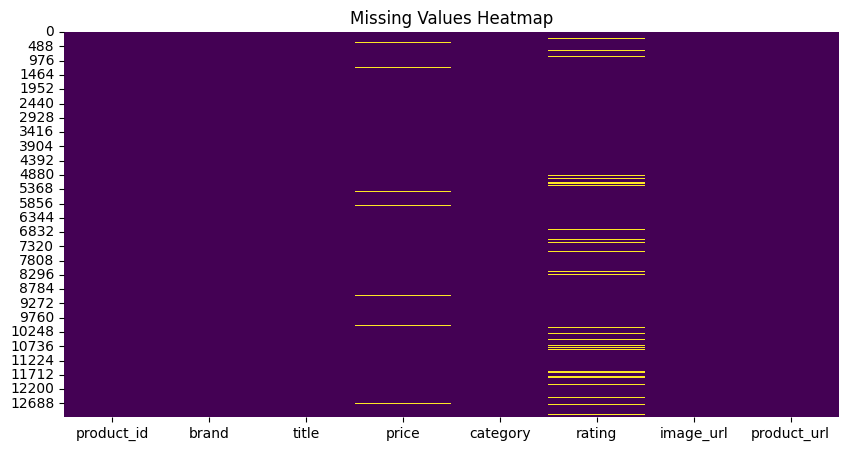


Summary Statistics for Numerical Features:
          count        mean         std   min   25%   50%    75%      max
price   12963.0  160.915024  312.435627  0.99  45.0  93.0  188.0  26000.0
rating  12273.0    4.235191    0.533392  1.00   4.0   4.4    4.6      5.0

Unique Values in Categorical Features:
product_id: 11369 unique values
brand: 2408 unique values
title: 10571 unique values
category: 11 unique values
image_url: 11171 unique values
product_url: 11369 unique values


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


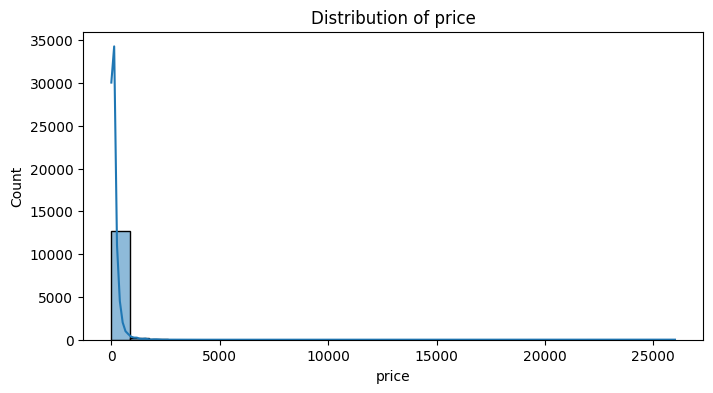

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


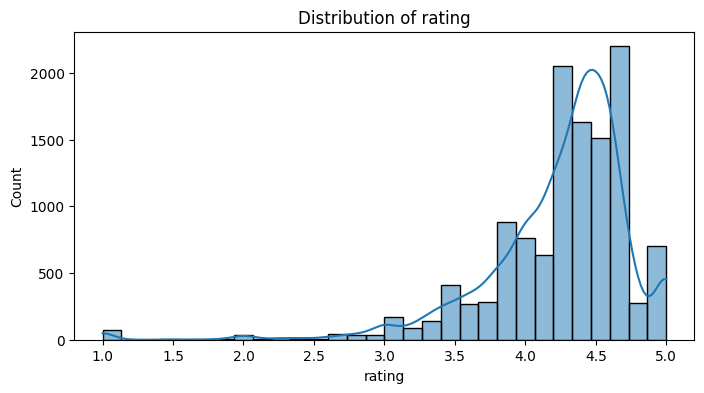

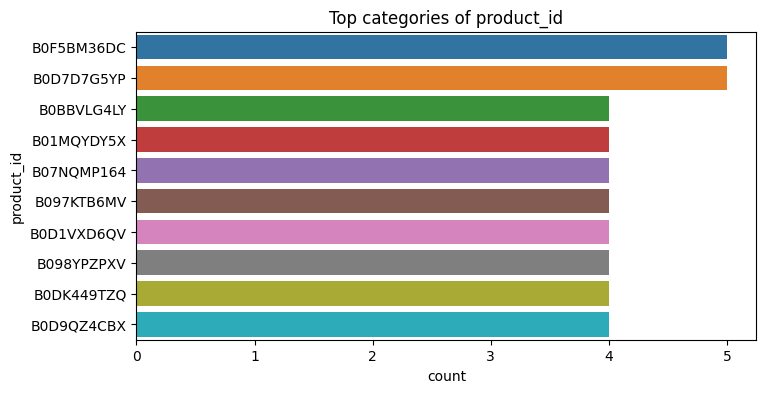

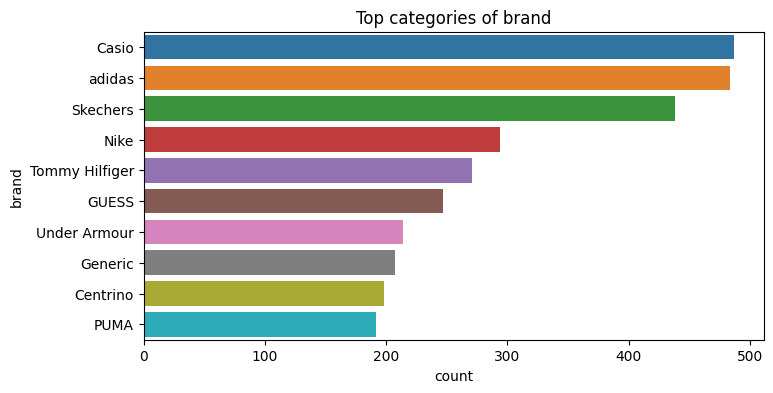

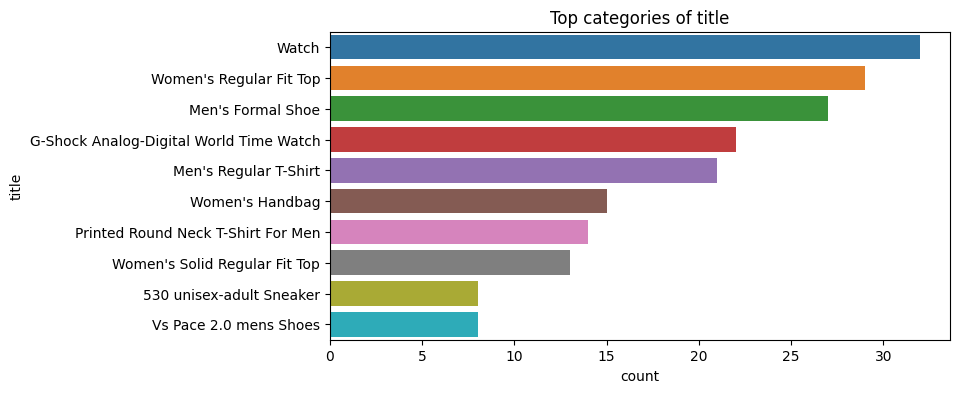

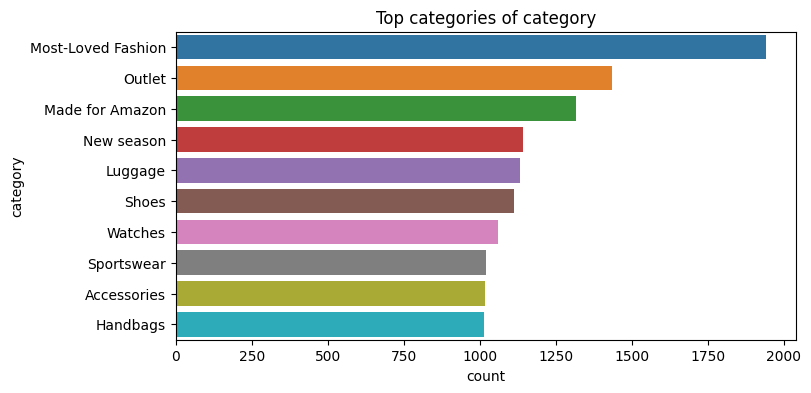

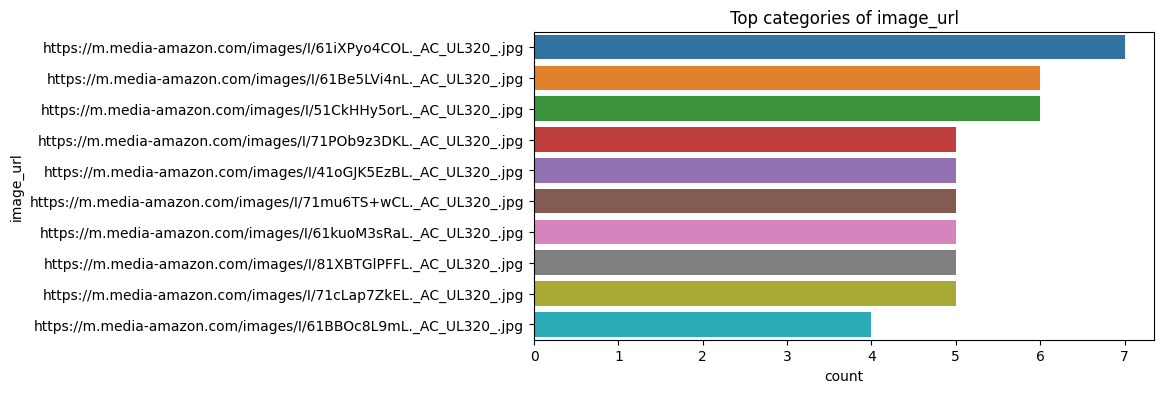

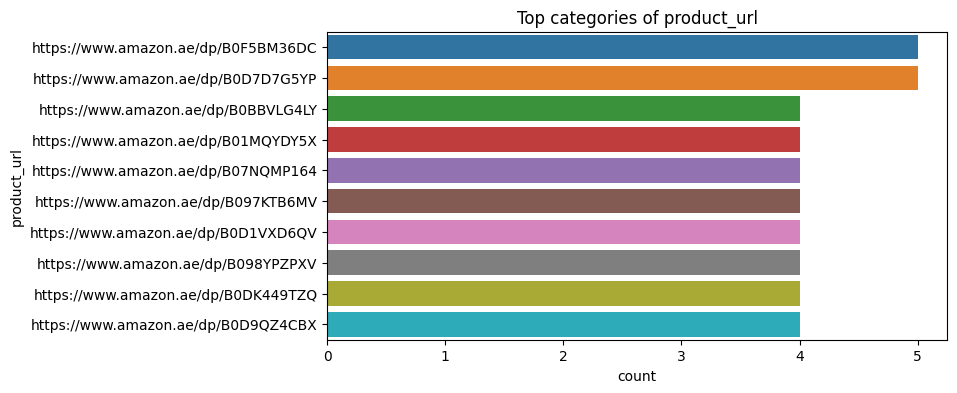

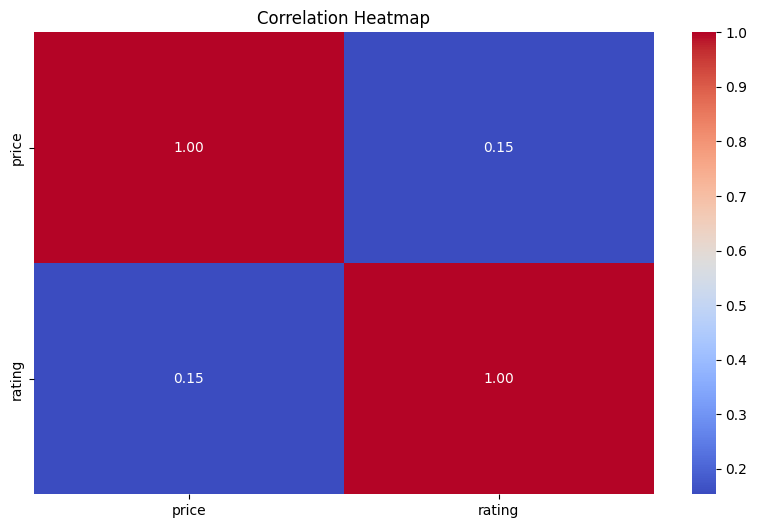

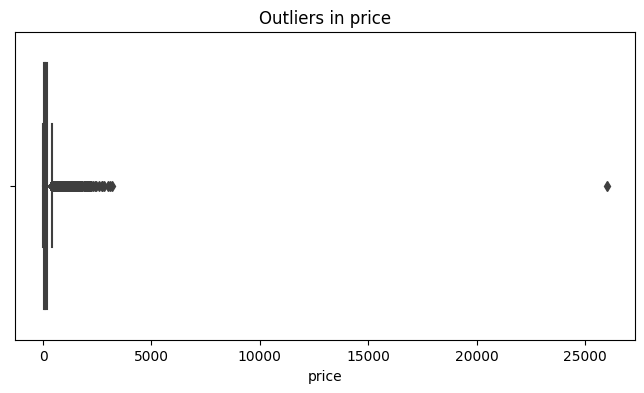

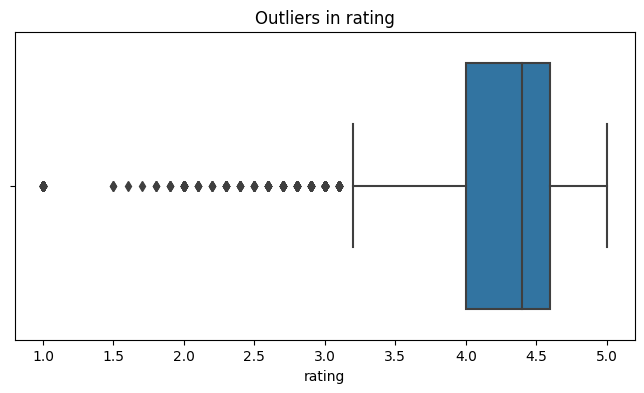

In [1]:
# =============================
#  EDA PIPELINE
# =============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# ======================
# STEP 1: LOAD DATA
# ======================
df = pd.read_csv("/kaggle/input/amazon-fashion-products/products.csv")

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nColumn Info:")
print(df.info())

# ======================
# STEP 2: MISSING VALUES
# ======================
print("\nMissing values per column:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# ======================
# STEP 3: BASIC STATISTICS
# ======================
print("\nSummary Statistics for Numerical Features:")
print(df.describe().T)

print("\nUnique Values in Categorical Features:")
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].nunique()} unique values")

# ======================
# STEP 4: NUMERICAL DISTRIBUTIONS
# ======================
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# ======================
# STEP 5: CATEGORICAL DISTRIBUTIONS
# ======================
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10])
    plt.title(f"Top categories of {col}")
    plt.show()

# ======================
# STEP 6: CORRELATION ANALYSIS
# ======================
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

# ======================
# STEP 7: OUTLIER DETECTION
# ======================
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

# ======================
# STEP 8: FEATURE IMPORTANCE (Optional - if target exists)
# ======================
target = None
for possible_target in ["target", "label", "BeatsPerMinute", "y"]:
    if possible_target in df.columns:
        target = possible_target
        break

if target:
    from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
    
    X = df.drop(columns=[target, "id"], errors="ignore")
    
    # Encode categorical variables
    for col in X.select_dtypes(include="object").columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
    
    y = df[target]
    
    # Train quick feature importance model
    if y.dtype == "object":
        model = RandomForestClassifier(random_state=42)
    else:
        model = RandomForestRegressor(random_state=42)
    
    model.fit(X.fillna(0), y)
    
    feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feat_imp[:20], y=feat_imp.index[:20])
    plt.title("Top 20 Feature Importances")
    plt.show()
